Assignment-1: Python Basics and Numpy

Question-1

In [7]:
#Importing necessary libraries
import string
import numpy as np
import re


# Empty list for all words from all files and all docs
all_words = []
docs = []
# Iterate through each text file
for i in range(1, 21):
    text_file = open(f'/content/{i}.txt', 'rb')
    text = text_file.read().decode('utf-8', 'ignore')
    # Removing punctuations using regular expressions
    text = re.sub(f'[{string.punctuation}]', '', text)
    # Removing numbers from the text data
    text = ''.join(c for c in text if not c.isdigit())
    # Coverting to lower case to avoid mismatches
    text = text.lower()
    docs.append(text)
    words = text.split() #using split() function for tokenization

    # Adding words to the list of all words
    all_words.extend(words)

# Getting the unique words from the list of all words
vocab = set(all_words)


#Setting matrix dimensions
M = len(vocab)
N = len(docs)

# Create an zero matrix with shape (M, N)
wdm = np.zeros((M, N))

# Iterating through each doc and incrementing the corresponding value for each word
for j, doc in enumerate(docs):
    for word in doc.split():
        if word in vocab:
            i = list(vocab).index(word)
            wdm[i, j] += 1

# Print the matrix and its dimensions
print(wdm)
print(wdm.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1130, 20)


Question-2

Heatmap is Displayed below:


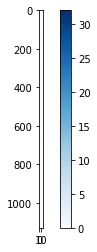

In [9]:
#importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

print("Heatmap is Displayed below:")

# Creates heatmap of the matrix and setting parameters
plt.imshow(wdm, cmap='Blues', vmin=np.min(wdm), vmax=np.max(wdm))
plt.colorbar() #Displays scale bar
plt.show()


Question-3

In [10]:
import numpy as np

# Get the number of documents
N = len(docs)

# Getting count of unique words in each doc into a list
word_counts = [[doc.count(word) for word in set(doc.split())] for doc in docs]

# Term frequency calculation
tf = wdm / np.sum(wdm, axis=0)

# Inverse document frquency calculation
idf = np.log(N / np.count_nonzero(wdm, axis=1))
idf = np.reshape(idf, (len(idf),1))

# TF-IDF scores
tf_idf = tf * idf

# Getting tf-idf scores for word in the matrix
scores = np.array(tf_idf.mean(axis=1)).ravel().tolist()
scores_data = dict(zip(all_words, scores))

print("The TF-IDF Scores for each word are below:")
print(scores_data)


The TF-IDF Scores for each word are below:
{'in': 0.0017021206099738586, 'days': 0.001976388283007331, 'nasas': 0.0010259357101212298, 'cassini': 0.0018667574470824563, 'spacecraft': 0.003032117685783392, 'will': 0.0009854382478796022, 'nosedive': 0.0006627726268924759, 'into': 0.002672214820756979, 'saturn': 0.000960170600498074, 'and': 0.0018266660204597507, 'burn': 0.0006627726268924759, 'up': 0.0009133330102298753, 'the': 0.002139808766824279, 'planets': 0.0023893170589730788, 'atmosphere': 0.0010259357101212298, 'its': 0.0017056185874029972, 'final': 0.0013024922928495614, 'suicidal': 0.0017056185874029972, 'step': 0.001126215140433831, 'of': 0.0, 'a': 0.001654190032303375, 'monthslong': 0.000960170600498074, 'dance': 0.0011347470733159056, 'through': 0.0013024922928495614, 'saturns': 0.000823003371855492, 'rings': 0.001152204720597689, 'that': 0.0030174753721352197, 'has': 0.0010474588369069897, 'given': 0.004848936308201048, 'scientists': 0.003245693381269924, 'an': 0.0010259357

Question-4

In [16]:
#importing necessary libraries
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# TfidfVectorizer object creation
tfidf_obj = TfidfVectorizer()

# Word document matrix creation by fitting TfidfVectorizer
word_document_matrix = tfidf_obj.fit_transform(docs)

# Find the cosine similarity between  given document and all other documents
given_document = docs[9]
given_document_matrix = tfidf_obj.transform([given_document])
cosine_similarities = cosine_similarity(given_document_matrix, word_document_matrix).flatten()

# Find the indices of the three most similar documents
indices = cosine_similarities.argsort()[-4:-1][::-1]

# Print the three most similar documents
print("Three most similar documents to 10.txt are:")
for i in indices:
    print(f"{i+1}.txt")

Three most similar documents to 10.txt are:
6.txt
16.txt
2.txt


Question-5

In [17]:
import numpy as np

# Setting matrix dimensions to N*N
N = len(docs)
B = np.zeros((N, N))

# Identifying common words count and setting the matrix values
for i in range(N):
    for j in range(N):
        common_words = set(docs[i].split()) & set(docs[j].split())
        B[i, j] = len(common_words)
print("B = ")
# Print matrix B
print(B)

B = 
[[ 63.  13.  14.  14.  15.  16.  15.  13.  18.  10.  12.  12.   9.  21.
   11.  16.   8.  14.  13.  13.]
 [ 13.  93.  21.  16.  23.  25.  17.  20.  12.  22.  16.  13.  15.  16.
   17.  17.  12.  21.  93.  18.]
 [ 14.  21.  88.  12.  17.  17.  18.  19.   8.  15.  15.  12.  15.  19.
   12.  17.  10.  16.  21.  17.]
 [ 14.  16.  12.  91.  19.  15.  13.  17.  14.  13.  17.  14.  17.  21.
   13.  12.  12.  20.  16.  15.]
 [ 15.  23.  17.  19. 109.  23.  18.  23.  11.  16.  18.  19.  16.  20.
   19.  18.  11.  26.  23.  20.]
 [ 16.  25.  17.  15.  23. 108.  17.  16.  13.  37.  18.  16.  14.  19.
   14.  17.  14.  21.  25.  20.]
 [ 15.  17.  18.  13.  18.  17. 107.  22.  12.  16.  14.  19.  23.  22.
   15.  17.  10.  20.  17.  21.]
 [ 13.  20.  19.  17.  23.  16.  22.  97.  16.  14.  20.  11.  17.  21.
   22.  16.  12.  30.  20.  22.]
 [ 18.  12.   8.  14.  11.  13.  12.  16.  87.  14.  13.  11.  15.  19.
   19.  12.  12.  14.  12.  14.]
 [ 10.  22.  15.  13.  16.  37.  16.  14.  14.  96